In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mobile_data (1).csv')
df.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,4.4


In [11]:
class LinearRegression:
    
    
    def __init__(self, alpha, epoch, epsilon):
        self.alpha = alpha
        self.epoch = epoch
        self.epsilon = epsilon
    
    def normalize(x):
        
        return (x-x.min())/(x.max()-x.min())
    
    def Linefit(self,x,y):
        x = LinearRegression.normalize(x)
        x = np.insert(x,0,np.ones((len(x))), axis =  1)
        w = np.ones((x.shape[1],1))
        w_arr = []
        for i in range(self.epoch):
            h = x@w
            grad = (x.T @ (h-y))/len(x)
            w = w - self.alpha*grad
            w_arr.append(w)
            J = np.sum(np.square(h - y))/(2*len(x))
            if J < self.epsilon:
                return J,w
        return J,w,w_arr
    
    def cost_plot(self,x,y):
        w0 = np.linspace(-20,20)
        w1 = np.linspace(-20,20)
        x = LinearRegression.normalize(x)
        x = np.insert(x,0,np.ones((len(x))), axis =  1)
        w = np.ones((x.shape[1],1))
        
        J = np.zeros((len(w0),len(w1)))
        for i,W11 in enumerate(w1):
            for j,W00 in enumerate(w0):
                w = np.array([W00,W11])
                h = x@w
                J[i,j] = (np.sum(np.square(h - y)))/(2*len(x))
        W0,W1 = np.meshgrid(w0,w1)
        fig,ax = plt.subplots(1,2,1)
        cs = ax[0].contour(W0,W1,J)
        ax[0].clabel(cs, inline = 1)
#         ax[1] = fig.add_subplot(111, projection = '3d')
#         ax[1].plot_surface(W0,W1,J)
        plt.show()

In [5]:
X = np.array(df.iloc[:, 1]).reshape(len(df),1)
Y = np.array(df.iloc[:, -1]).reshape(len(df),1)
print(X.shape, Y.shape)

(341, 1) (341, 1)


In [6]:
model = LinearRegression(alpha = 0.005, epoch = 100000, epsilon = 0.0001)
J,W,weight_arr= model.Linefit(X,Y)

In [7]:
print('slope of the line: ', W[1])
print('intercept of the line: ', W[0])
print('MSE for the model: ', J)

slope of the line:  [0.40024157]
intercept of the line:  [3.88644542]
MSE for the model:  0.06757037493756256


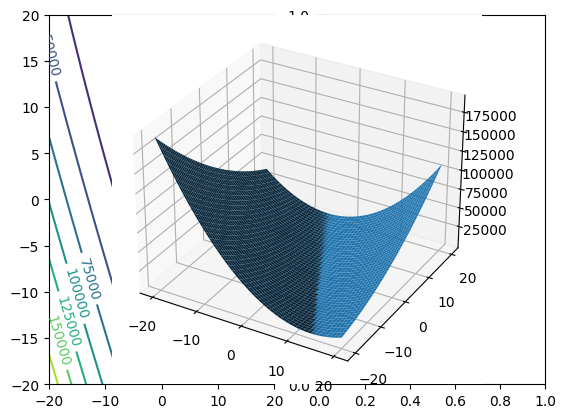

In [12]:
model.cost_plot(X,Y)

In [ ]:
x = np.linspace(0,10)
y = W[0]*x +W[1]
plt.plot(x,y)
plt.scatter(range(len(Y)),Y)
plt.show()

In [ ]:
plt.plot(range(len(Y)),Y)
